# **6주차 - 1** : 1차원 Ising 모형, Ensemble 평균, 자기장 변화

##**1차원 Ising Model**

N = 1000개로 이루어진 1차원 이징 모형

**(a)** 초기에 $T = \infty$ 인 랜덤 배치에서 $T = J$의 평형 상태로 가는 것을 $ene(t)$와 $mag(t)$를 시간 $t$에 대한 그래프로 나타내기.

1. 초기 N개의 스핀 상태를 랜덤하게 정한다. $s_i \in \{-1,+1\}$
2. 한 타임 : 임의의 $i$번째의 스핀을 변화시키는 것을 1000번 한 것
3. 스핀의 변화는 확률에 따라 변화 or 유지로 정해진다.
> $p = e^{[-2J(s_{i-1}+s_{k+1})s_k-2B_{s_k}]/k_BT}$
4. 총 에너지 : $ene(t) = H(x(t)) = -J\displaystyle\sum_{i}s_is_{i+1} -B\displaystyle\sum_{i}s_i$
5. $mag(t) = \frac{1}{N}\displaystyle\sum_{i}s_i $

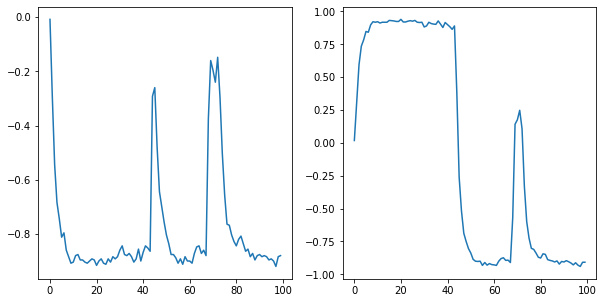

In [ ]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

# i+1번째 => 마지막 i = N이면, i+1번째는 0으로 감
def pd_cond():
  for i in range(N-1): mp[i] = i+1;
  mp[N-1] = 0;

# 초기 상태의 스핀 정하기
def ini_config():
  for i in range(N):
    if nr.rand() < 0.5: s[i] = 1
    else: s[i] = -1

# 해밀토니안 계산하기
def mea_ene():
  sm = np.roll(s,1)  ### 배열 요소 굴리기 : 스핀 s 배열을 오른쪽으로 1번 굴린 배열 만들기
  return(np.mean(-J*s*sm-B*s))

# 변화하는 확률 구하기
def proba():
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

# 확률에 따른 변화
def monte():
  for k in range(N):
    i = nr.randint(0,N)
    if (nr.rand() < pflip[(s[i-1],s[i],s[mp[i]])]) : s[i] = -s[i]

# 초기 조건 & 시간별로 바뀌는 것 계산하기
J=1; B=0; N=1000; Tmax=100; temp=1
s = np.zeros(N,int)
mp = np.zeros(N,int)
ini_config()
ene = [mea_ene()]
mag = [np.mean(s)]
pflip = proba()
for t in range(1,Tmax):
  monte()
  ene.append(mea_ene())
  mag.append(np.mean(s))

# 그래프 그리기
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene)
axs[1].plot(xt,mag)
plt.show()

**(b)** (a)의 과정을 $R = 10$회 반복하여 $ene(t)$와 $|mag(t)|$의 앙상블 평균 $E(t)$와 $M(t)$를 시간 $t$에 대한 그래프로 나타내기

1. 초기 N개의 스핀 상태를 랜덤하게 정한다. $s_i \in \{-1,+1\}$
2. 한 타임 : 임의의 i번째의 스핀을 변화시키는 것을 1000번 한 것
3. 스핀의 변화는 확률에 따라 변화 or 유지로 정해진다.
> $p = e^{[-2J(s_{i-1}+s_{k+1})s_k-2B_{s_k}]/k_BT}$
4. 총 에너지 : $ene(t) = H(x(t)) = -J\displaystyle\sum_{i}s_is_{i+1} -B\displaystyle\sum_{i}s_i$
5. $mag(t) = \frac{1}{N}\displaystyle\sum_{i}s_i $
6. 위에 1 ~ 5번을 R회 반복 !
7. Ensemble average 앙상블 평균
> $E(t) = \frac{1}{R}\displaystyle\sum_{r=1}^{R}ene_r(t) $

  > $M(t) = \frac{1}{R}\displaystyle\sum_{r=1}^{R}|mag_r(t)| $

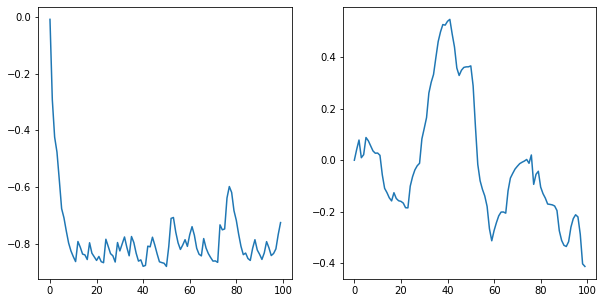

In [ ]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

# i+1번째 => 마지막 i = N이면, i+1번째는 0으로 감
def pd_cond():
  for i in range(N-1): mp[i] = i+1;
  mp[N-1] = 0;

# 초기 상태의 스핀 정하기
def ini_config():
  for i in range(N):
    if nr.rand() < 0.5: s[i] = 1
    else: s[i] = -1

# 해밀토니안 계산하기
def mea_ene():
  sm = np.roll(s,1)
  return(np.mean(-J*s*sm-B*s))

# 변화하는 확률 구하기
def proba():
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

# 확률에 따른 변화
def monte():
  for k in range(N):
    i = nr.randint(0,N)
    if (nr.rand() < pflip[(s[i-1],s[i],s[mp[i]])]) : s[i] = -s[i]

# 초기 조건 & 시간별로 바뀌는 것 계산하기
J=1; B=0; N=1000; Tmax=100; temp=1; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()

# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av = np.mean(ee, axis=0)
mag_av = np.mean(mm, axis=0)

# 그래프 그리기
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av)
axs[1].plot(xt,mag_av)
plt.show()

**(c)** 자기장이 있을 때, 온도별 변화하는 그래프 확인해보기

$B = 10, Temp = 0.1$

$B = 10, Temp = 1$

$B = 10, Temp = 10$

$B = 10, Temp = 100$

 < B = 10, temp = 0.1 >


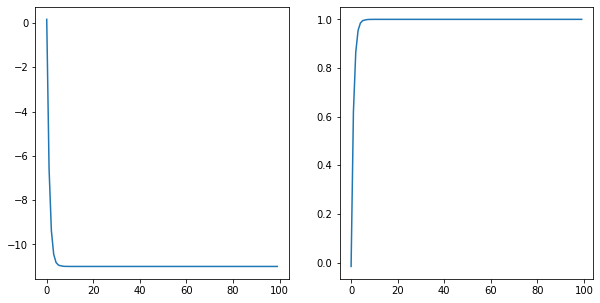

 < B = 10, temp = 1 >


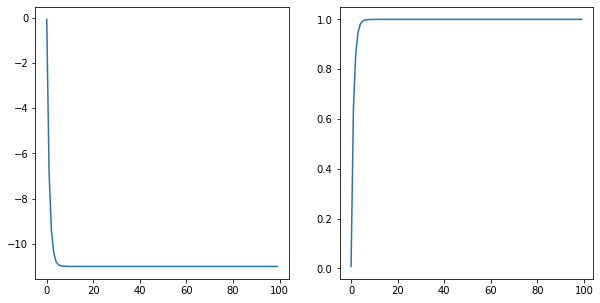

 < B = 10, temp = 10 >


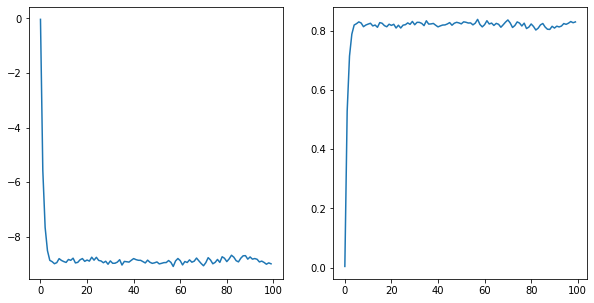

 < B = 10, temp = 100 >


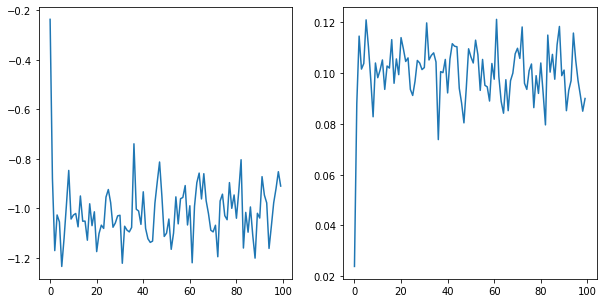

In [ ]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

# i+1번째 => 마지막 i = N이면, i+1번째는 0으로 감
def pd_cond():
  for i in range(N-1): mp[i] = i+1;
  mp[N-1] = 0;

# 초기 상태의 스핀 정하기
def ini_config():
  for i in range(N):
    if nr.rand() < 0.5: s[i] = 1
    else: s[i] = -1

# 해밀토니안 계산하기
def mea_ene():
  sm = np.roll(s,1)
  return(np.mean(-J*s*sm-B*s))

# 변화하는 확률 구하기
def proba():
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

# 확률에 따른 변화
def monte():
  for k in range(N):
    i = nr.randint(0,N)
    if (nr.rand() < pflip[(s[i-1],s[i],s[mp[i]])]) : s[i] = -s[i]

# 초기 조건 (B=10, Temp=0.1) & 시간별로 바뀌는 것 계산하기
J=1; B=10; N=1000; Tmax=100; temp=0.1; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av1 = np.mean(ee, axis=0)
mag_av1 = np.mean(mm, axis=0)

# 초기 조건 (B=10, Temp=1) & 시간별로 바뀌는 것 계산하기
J=1; B=10; N=1000; Tmax=100; temp=1; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av2 = np.mean(ee, axis=0)
mag_av2 = np.mean(mm, axis=0)

# 초기 조건 (B=10, Temp=10) & 시간별로 바뀌는 것 계산하기
J=1; B=10; N=1000; Tmax=100; temp=10; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av3 = np.mean(ee, axis=0)
mag_av3 = np.mean(mm, axis=0)

# 초기 조건 (B=10, Temp=100) & 시간별로 바뀌는 것 계산하기
J=1; B=10; N=1000; Tmax=100; temp=100; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av4 = np.mean(ee, axis=0)
mag_av4 = np.mean(mm, axis=0)

# 그래프 그리기
print('\033[1m','< B = 10, temp = 0.1 >')
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av1)
axs[1].plot(xt,mag_av1)
plt.show()

print('\033[1m','< B = 10, temp = 1 >')
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av2)
axs[1].plot(xt,mag_av2)
plt.show()

print('\033[1m','< B = 10, temp = 10 >')
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av3)
axs[1].plot(xt,mag_av3)
plt.show()

print('\033[1m','< B = 10, temp = 100 >')
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av4)
axs[1].plot(xt,mag_av4)
plt.show()

print('\033[0m')

**$\Rightarrow$** 같은 자기장에서, 온도만 바꾸었을 때 온도가 커질수록 수렴하기까지 오랜 시간이 걸린다.

**+@.** 자기장만 바뀌었을 때는? 그래프 변화 보기!

$ B = 0 $

$ B = 0.1 $

$ B = 1 $

$ B = 10 $

 < B = 0 >


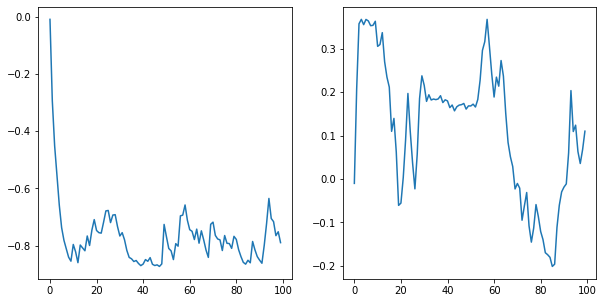

 < B = 0.1 >


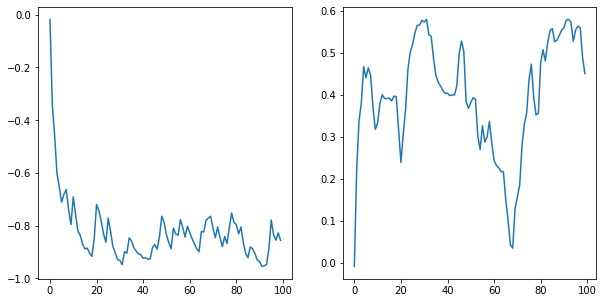

 < B = 1 >


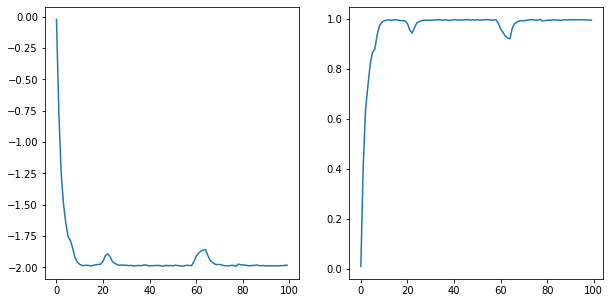

 < B = 10 >


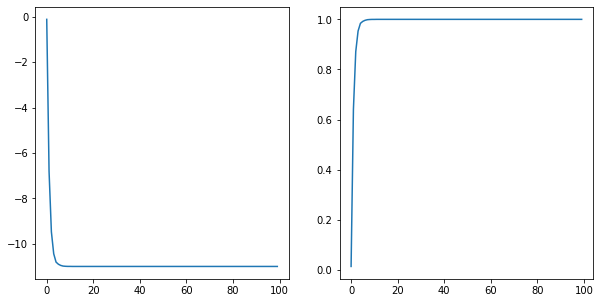

In [ ]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

# i+1번째 => 마지막 i = N이면, i+1번째는 0으로 감
def pd_cond():
  for i in range(N-1): mp[i] = i+1;
  mp[N-1] = 0;

# 초기 상태의 스핀 정하기
def ini_config():
  for i in range(N):
    if nr.rand() < 0.5: s[i] = 1
    else: s[i] = -1

# 해밀토니안 계산하기
def mea_ene():
  sm = np.roll(s,1)
  return(np.mean(-J*s*sm-B*s))

# 변화하는 확률 구하기
def proba():
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

# 확률에 따른 변화
def monte():
  for k in range(N):
    i = nr.randint(0,N)
    if (nr.rand() < pflip[(s[i-1],s[i],s[mp[i]])]) : s[i] = -s[i]

# 초기 조건 (B=0, Temp=1) & 시간별로 바뀌는 것 계산하기
J=1; B=0; N=1000; Tmax=100; temp=1; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av1 = np.mean(ee, axis=0)
mag_av1 = np.mean(mm, axis=0)

# 초기 조건 (B=0.1, Temp=1) & 시간별로 바뀌는 것 계산하기
J=1; B=0.1; N=1000; Tmax=100; temp=1; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av2 = np.mean(ee, axis=0)
mag_av2 = np.mean(mm, axis=0)

# 초기 조건 (B=1, Temp=1) & 시간별로 바뀌는 것 계산하기
J=1; B=1; N=1000; Tmax=100; temp=1; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av3 = np.mean(ee, axis=0)
mag_av3 = np.mean(mm, axis=0)

# 초기 조건 (B=10, Temp=1) & 시간별로 바뀌는 것 계산하기
J=1; B=10; N=1000; Tmax=100; temp=1; R=10
s = np.zeros(N,int)
mp = np.zeros(N,int)
pflip = proba()
# 실행 R번
ee, mm = [], []
for r in range(R):
  ini_config()
  ene = [mea_ene()]
  mag = [np.mean(s)]
  for t in range(1,Tmax):
    monte()
    ene.append(mea_ene())
    mag.append(np.mean(s))
  ee.append(ene)
  mm.append(mag)
ene_av4 = np.mean(ee, axis=0)
mag_av4 = np.mean(mm, axis=0)

# 그래프 그리기
print('\033[1m','< B = 0 >')
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av1)
axs[1].plot(xt,mag_av1)
plt.show()

print('\033[1m','< B = 0.1 >')
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av2)
axs[1].plot(xt,mag_av2)
plt.show()

print('\033[1m','< B = 1 >')
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av3)
axs[1].plot(xt,mag_av3)
plt.show()

print('\033[1m','< B = 10 >')
fit, axs = plt.subplots(1,2,figsize=(10,5))
xt = np.linspace(0,Tmax-1,Tmax)
axs[0].plot(xt,ene_av4)
axs[1].plot(xt,mag_av4)
plt.show()

print('\033[0m')

**$\Rightarrow$** 자기장이 커질수록 수렴이 잘된다.

**(d)** N = 20, T = 0.5, R = 200일 때, 평형상태의 평형 자화율, 평형 에너지 구하기

평형 자화율 : $M_{eq}(T) = \frac{1}{t_{mea}}\displaystyle\sum_{t=t_{eq}+1}^{t_{eq}+t_{mea}}M(t)$

평형 에너지 : $E_{eq}(T) = \frac{1}{t_{mea}}\displaystyle\sum_{t=t_{eq}+1}^{t_{eq}+t_{mea}}E(t)$